# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [1]:
%matplotlib inline

import random

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [3]:
n = 50 # number of examples

xs = [random.random() for _ in xrange(n)] # features
ys = map(g, xs) # targets

ts = map(f, xs) # we don't get to see this

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

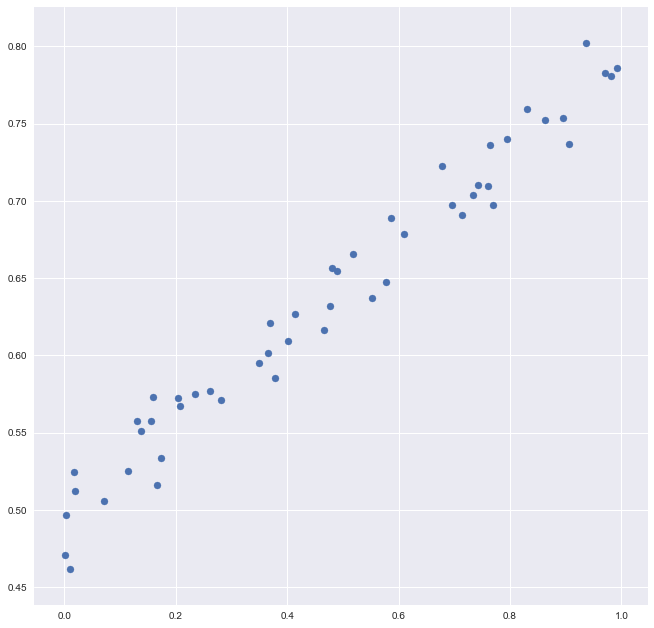

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [10]:
def l2_loss(ys, ps):
    assert len(ys) == len(ps)
    return sum((y - p)**2 for (y, p) in zip(ys, ps))

Please take a while to (roughly) guess the output before executing the cell below.

In [11]:
l2_loss(ys, ts)

0.015657489696808816

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [15]:
from numpy import mean

a = 0. # our initial guess for _a
b = 0. # our initial guess for _b
lr = 0.5 # step size

n_epochs = 40 # number of passes over the training data

"""
Returns a list of values when coefficients are a and b for the value range xs.
"""
def predict(a, b, xs=xs):
    return [a * x + b for x in xs]

"""
Computes the loss function for the coeffs. a and b
"""
def evaluate(a, b, xs=xs, ys=ys):
    return l2_loss(ys, predict(a, b, xs))

losses = [evaluate(a, b)]

# Here we want to gradually adjust a and b
# We want to use the step size lr

# Here we mean to compute means
x_m = mean(xs)
y_m = mean(ys)
x_squared_m = mean([x**2 for x in xs])
xy_m = mean([x * g(x) for x in xs])

# Now we can define the partial derivatives
di_da = lambda a, b: x_squared_m * a + x_m * b - xy_m
di_db = lambda a, b: x_m * a + b - y_m

for i in xrange(n_epochs):
    a_ = a - lr * di_da(a, b)
    b_ = b - lr * di_db(a, b)
    a = a_
    b = b_
    
    loss = evaluate(a, b)
    losses.append(loss)
    
    print 'Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, a, b)

Iter:   0 Loss: 2.99398727 a:  0.16320, b:  0.31725
Iter:   1 Loss: 0.44635749 a:  0.22667, b:  0.43768
Iter:   2 Loss: 0.07801597 a:  0.25205, b:  0.48304
Iter:   3 Loss: 0.02512153 a:  0.26285, b:  0.49978
Iter:   4 Loss: 0.01749235 a:  0.26805, b:  0.50562
Iter:   5 Loss: 0.01622537 a:  0.27107, b:  0.50732
Iter:   6 Loss: 0.01581796 a:  0.27322, b:  0.50746
Iter:   7 Loss: 0.01552851 a:  0.27501, b:  0.50703
Iter:   8 Loss: 0.01527015 a:  0.27661, b:  0.50640
Iter:   9 Loss: 0.01503682 a:  0.27811, b:  0.50571
Iter:  10 Loss: 0.01482883 a:  0.27955, b:  0.50501
Iter:  11 Loss: 0.01464543 a:  0.28092, b:  0.50432
Iter:  12 Loss: 0.01448510 a:  0.28223, b:  0.50366
Iter:  13 Loss: 0.01434602 a:  0.28350, b:  0.50302
Iter:  14 Loss: 0.01422636 a:  0.28472, b:  0.50241
Iter:  15 Loss: 0.01412440 a:  0.28589, b:  0.50181
Iter:  16 Loss: 0.01403851 a:  0.28702, b:  0.50124
Iter:  17 Loss: 0.01396719 a:  0.28811, b:  0.50069
Iter:  18 Loss: 0.01390905 a:  0.28915, b:  0.50016
Iter:  19 Lo

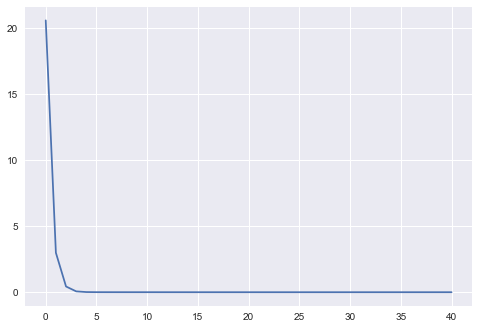

In [16]:
plt.plot(losses)

Let's now visually asses how we do on training data

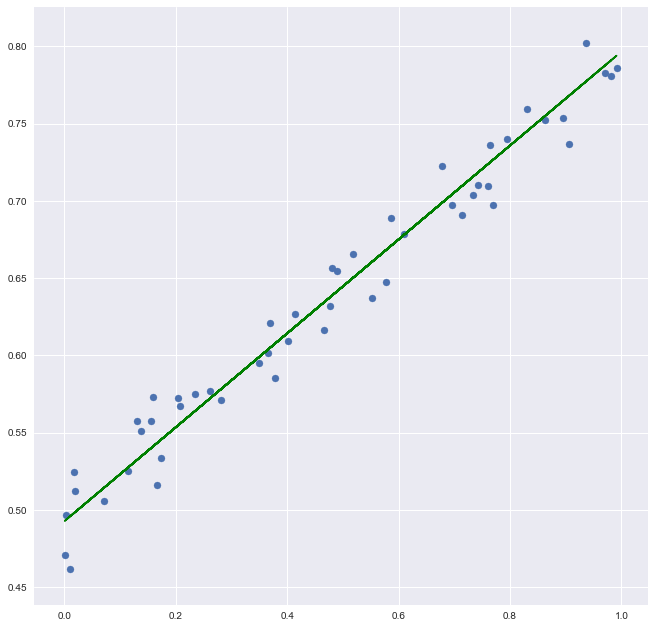

In [17]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.show()

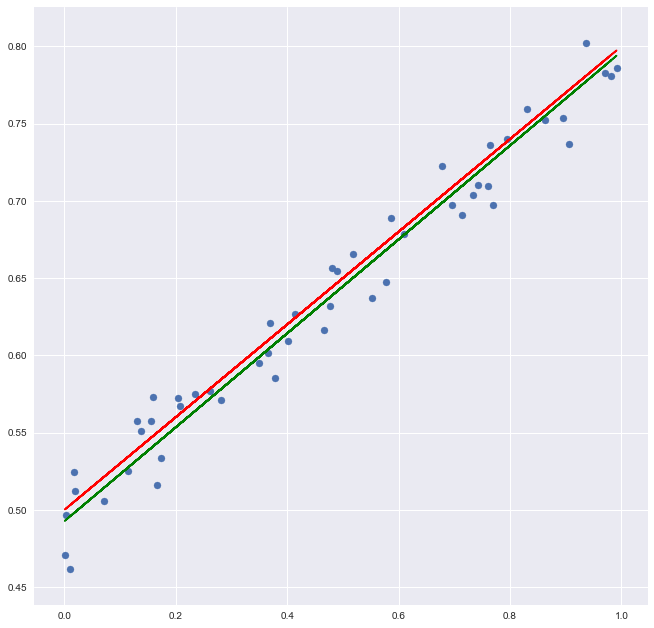

In [20]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')

plt.plot(xs, [f(x) for x in xs], c='r')

plt.show()

Let's check our implementation vs. the one in sklearn

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # traini

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print 'Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(
    sk_loss, sk_a, sk_b)

Loss: 0.01373926 a:  0.29419, b:  0.49678
